## Análise das vendas de produtos no Wish - Solução

Você foi contratado por uma empresa que planeja revender produtos no Wish. Seu objetivo vai ser ajudá-los a entender que fatores são os mais importantes para definir o sucesso de determinados produtos dentro da plataforma. Utilize as ferramentas estudadas até aqui para tirar insights e auxiliar a empresa do ponto de vista estratégico.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Perguntas possíveis

- Produtos com maior discrepância entre preço real e de retail vendem mais?
- Ad boost aumentam as vendas?
- Avaliações melhores aumentam vendas?
- Badges importam?
- Quantidade de tags auxiliam vendas?
- Tags com maiores vendas?
- Tempo de existência do produto
- Shipping analysis
- Todos os produtos contém fotos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df_products.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


## 1. Análise da qualidade dos dados

In [4]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [5]:
cols = ['title', 'price', 'retail_price', 'currency_buyer', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'badges_count', 'badge_product_quality', 'badge_fast_shipping', 'tags',
          'product_color', 'product_variation_size_id', 'product_variation_inventory', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'origin_country',
          'merchant_rating_count', 'merchant_rating']

In [6]:
df_products = df_products[cols]

In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   currency_buyer               1573 non-null   object 
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   int64  
 6   rating                       1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   badges_count                 1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

### 1.1. Análise de dados ausentes

In [8]:
df_products.isna().sum()

,0
title,0
price,0
retail_price,0
currency_buyer,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
badge_product_quality,0


As colunas "product_color", "product_variation_size_id", "has_urgency_banner" e "origin_country" possuem dados problemáticos.

In [9]:
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""
df_products.loc[df_products["product_variation_size_id"].isna(), "product_variation_size_id"] = ""
df_products.loc[df_products["has_urgency_banner"].isna(), "has_urgency_banner"] = 0
df_products.loc[df_products["origin_country"].isna(), "origin_country"] = ""

In [10]:
df_products.isna().sum()

,0
title,0
price,0
retail_price,0
currency_buyer,0
units_sold,0
uses_ad_boosts,0
rating,0
rating_count,0
badges_count,0
badge_product_quality,0


### 1.2. Qual das colunas são categóricas e quais são numéricas?

In [11]:
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000


In [12]:
categorical_cols = [i for i in cols if i not in df_products.describe().columns]
numerical_cols = df_products.describe().columns

In [13]:
categorical_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [14]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

## 2. Análise exploratória dos dados

### 2.1. Análise de distribuição dos dados

#### 2.1.1 Dados categóricos

In [15]:
categorical_cols

['title',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country']

In [16]:
df_products["tags"]

,tags
0,"Summer,Fashion,womenunderwearsuit,printedpajam..."
1,"Mini,womens dresses,Summer,Patchwork,fashion d..."
2,"Summer,cardigan,women beachwear,chiffon,Sexy w..."
3,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri..."
4,"Summer,Plus Size,Lace,Casual pants,Bottom,pant..."
...,...
1568,"bohemia,Plus Size,dandelionfloralprinted,short..."
1569,"Summer,Panties,Elastic,Lace,Casual pants,casua..."
1570,"runningshort,Beach Shorts,beachpant,menbeachsh..."
1571,"Summer,fashion women,Fashion,Lace,Dresses,Dres..."


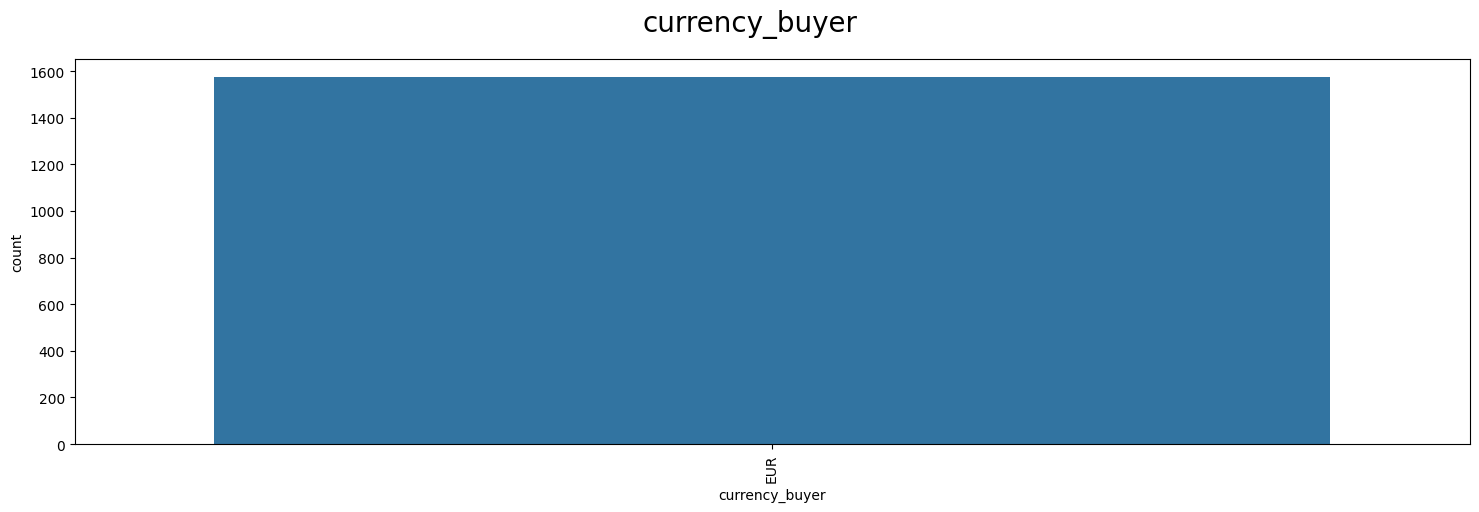

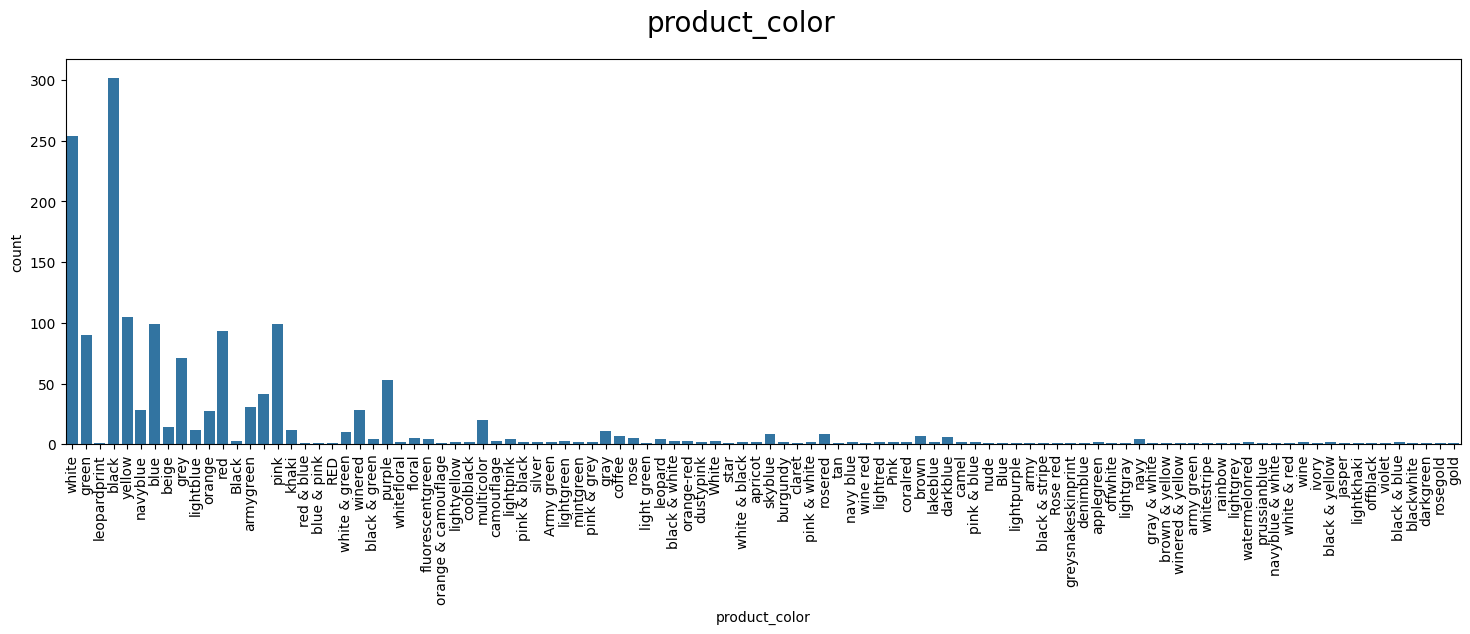

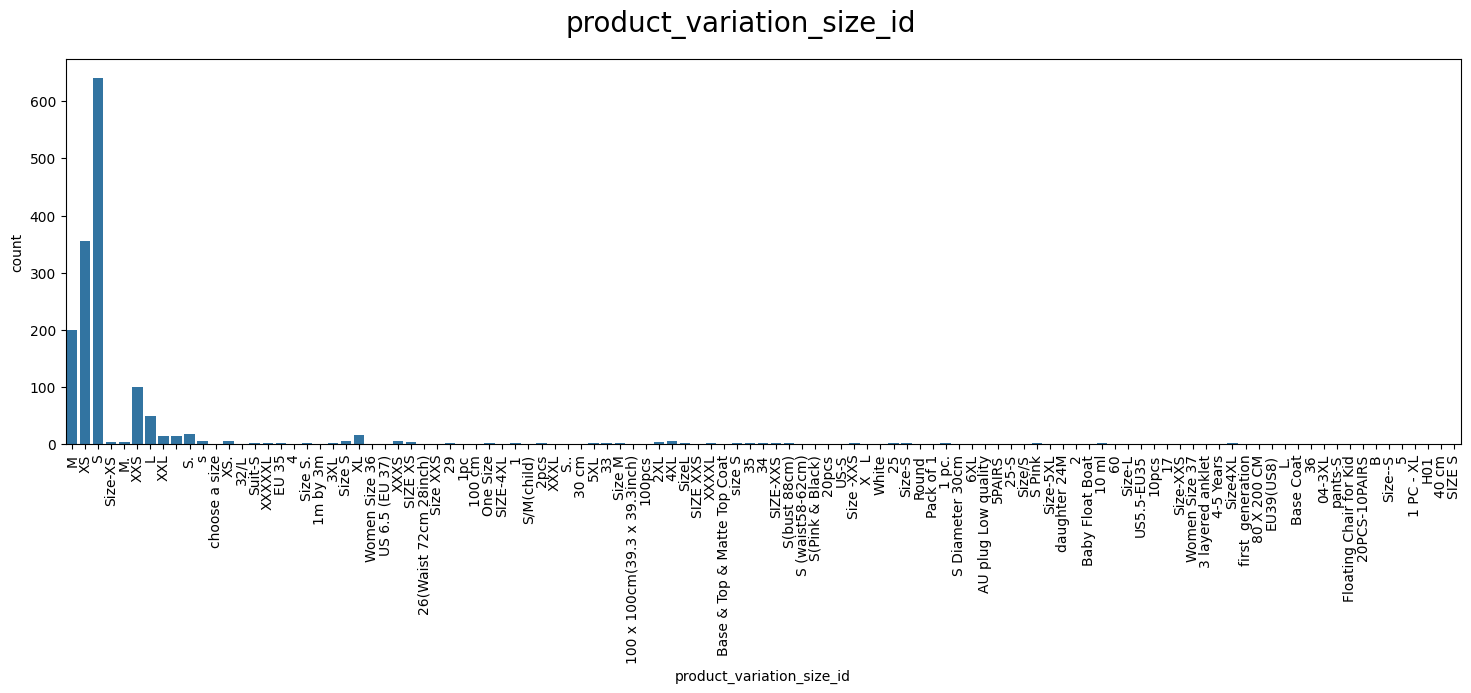

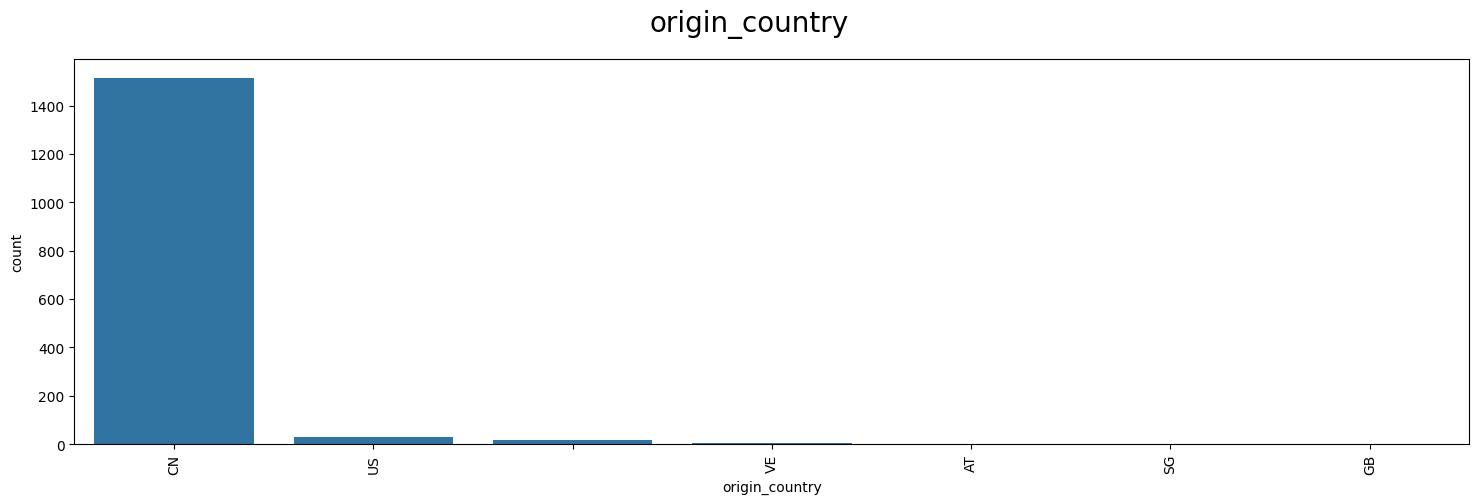

In [17]:
for col in categorical_cols:
    if col not in ["title", "tags"]:
        fig, ax = plt.subplots(1, 1, figsize=(18,5))
        sns.countplot(x=col, data = df_products)
        plt.xticks(rotation=90)
        plt.suptitle(col,fontsize=20)
        plt.show()

#### 2.1.2. Dados numéricos

In [18]:
numerical_cols

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

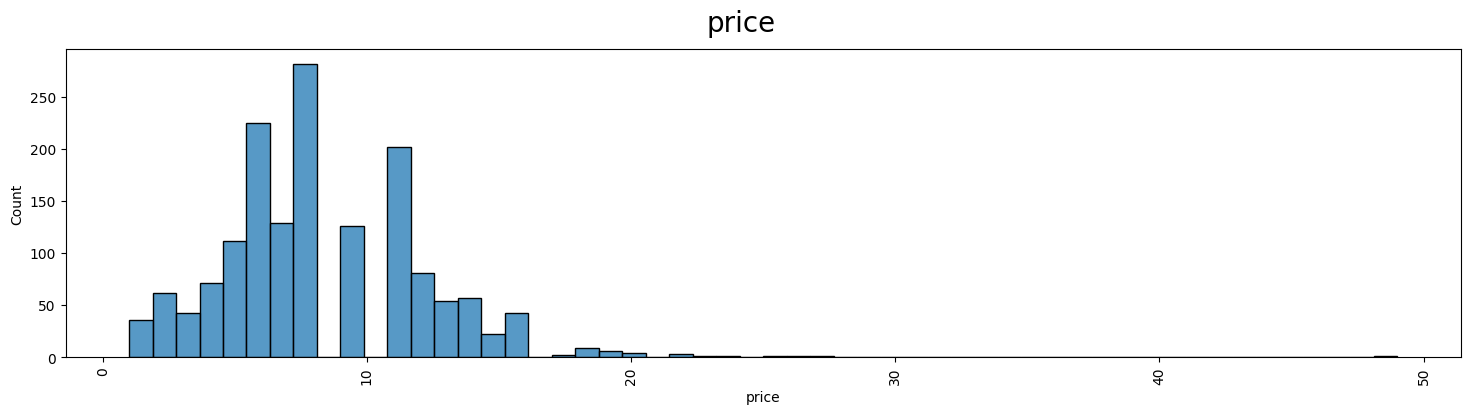

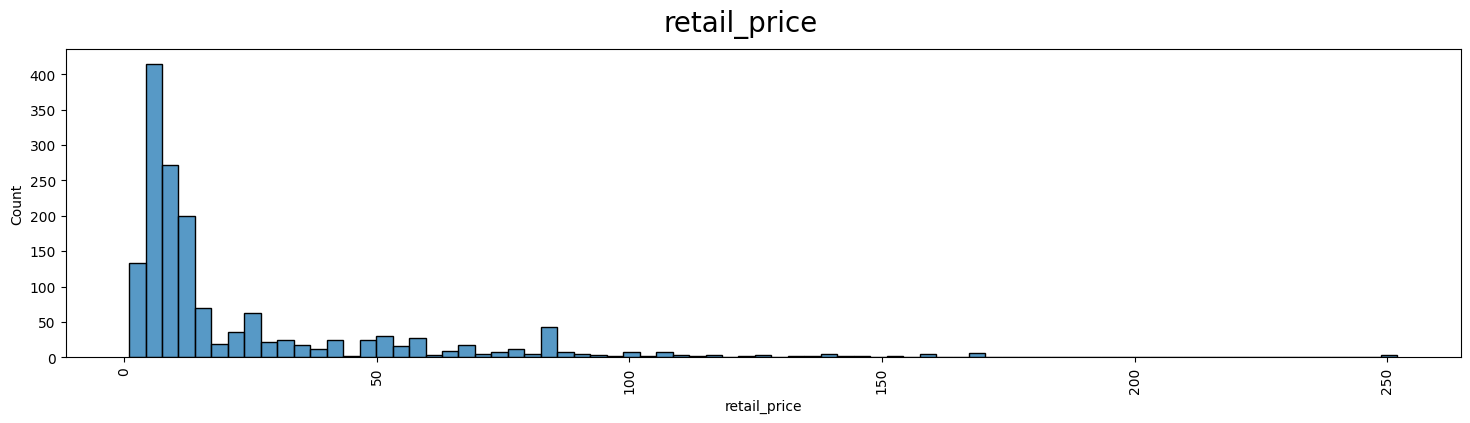

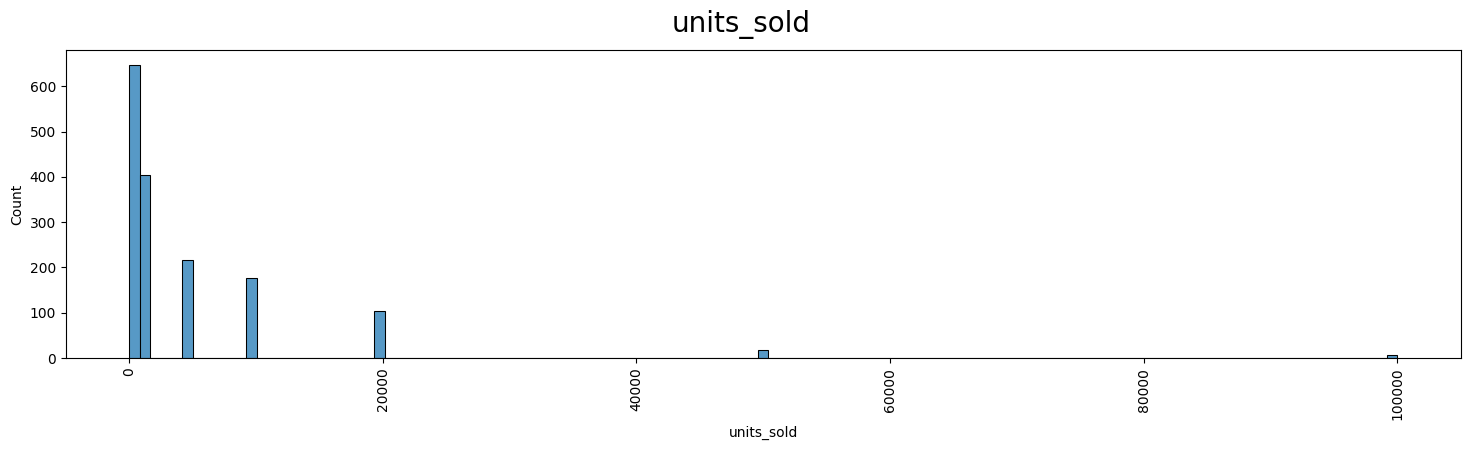

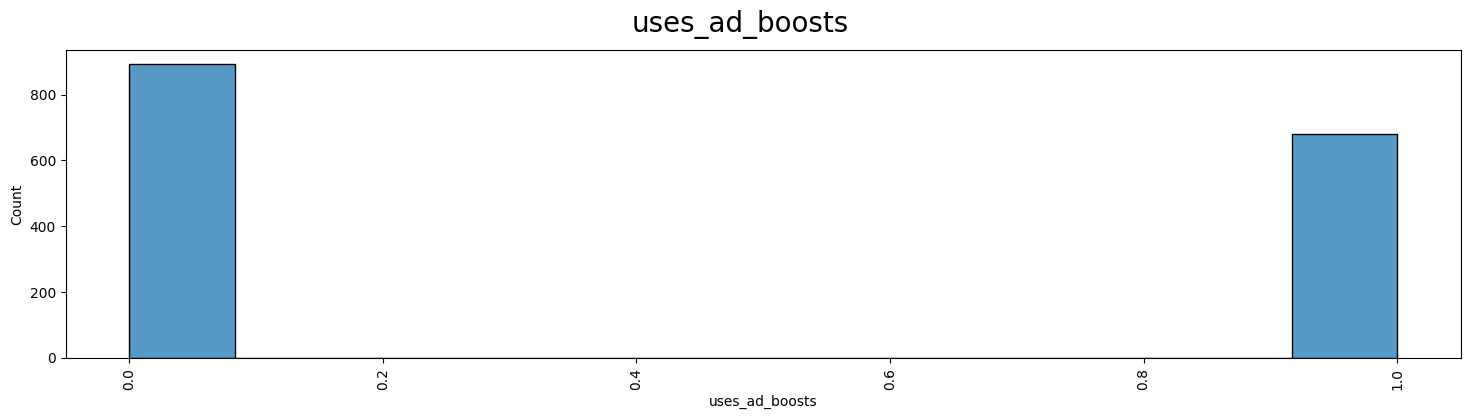

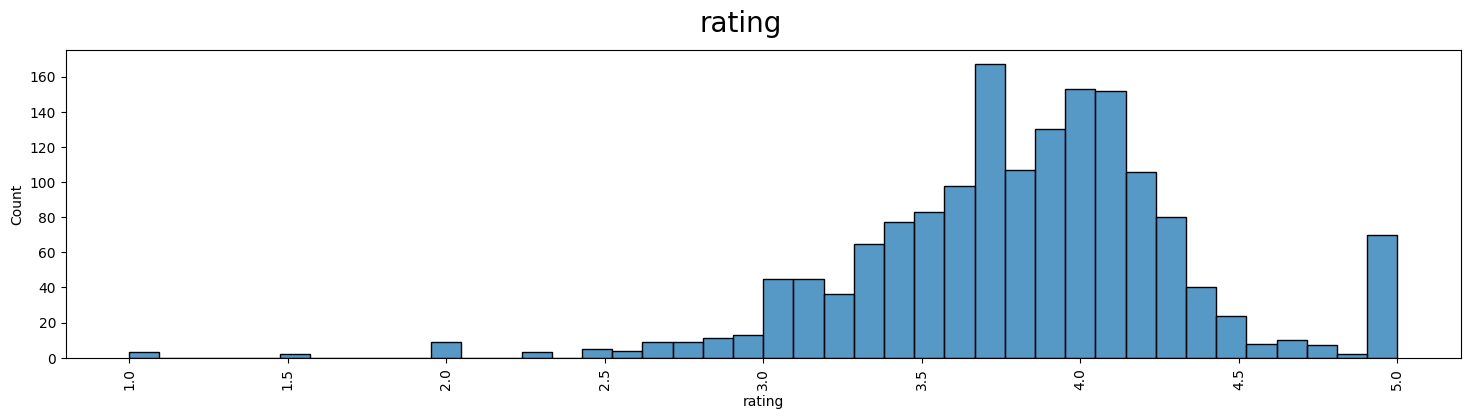

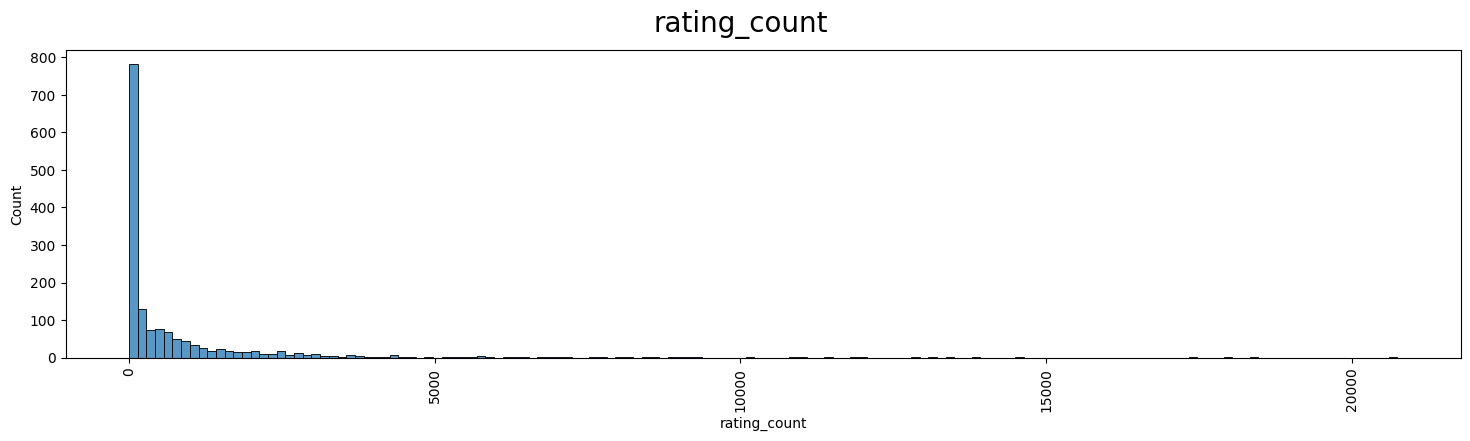

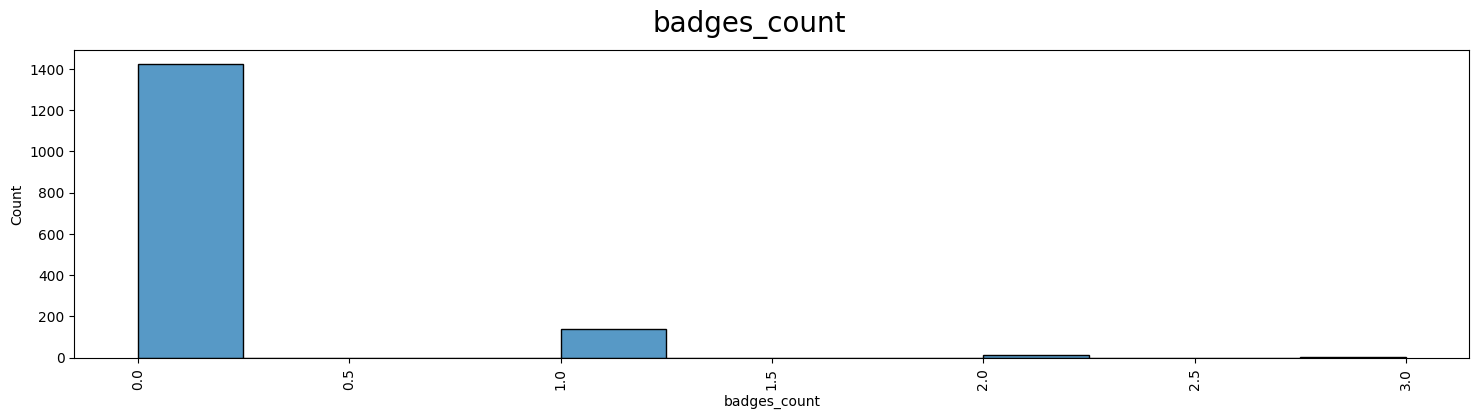

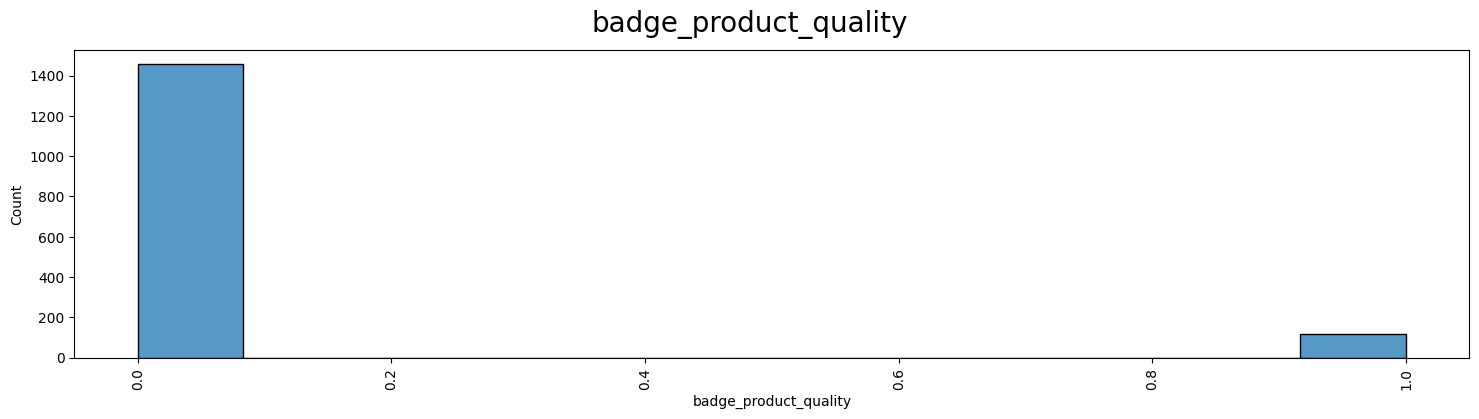

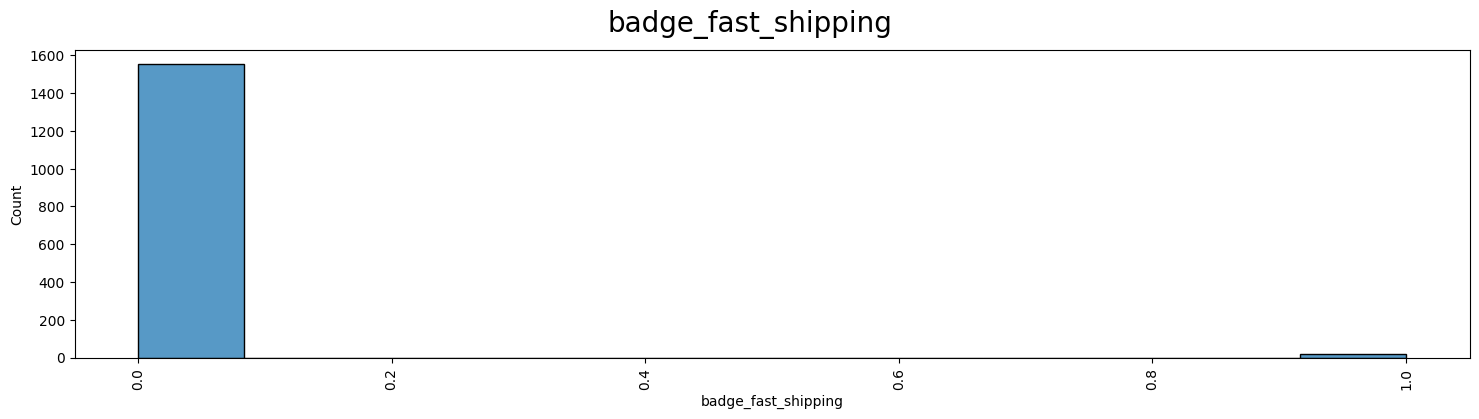

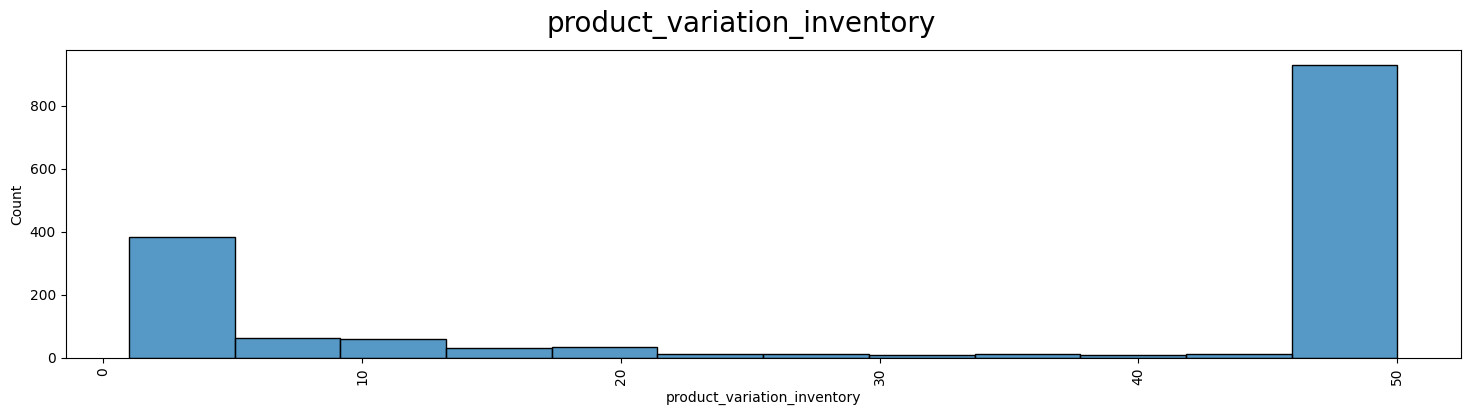

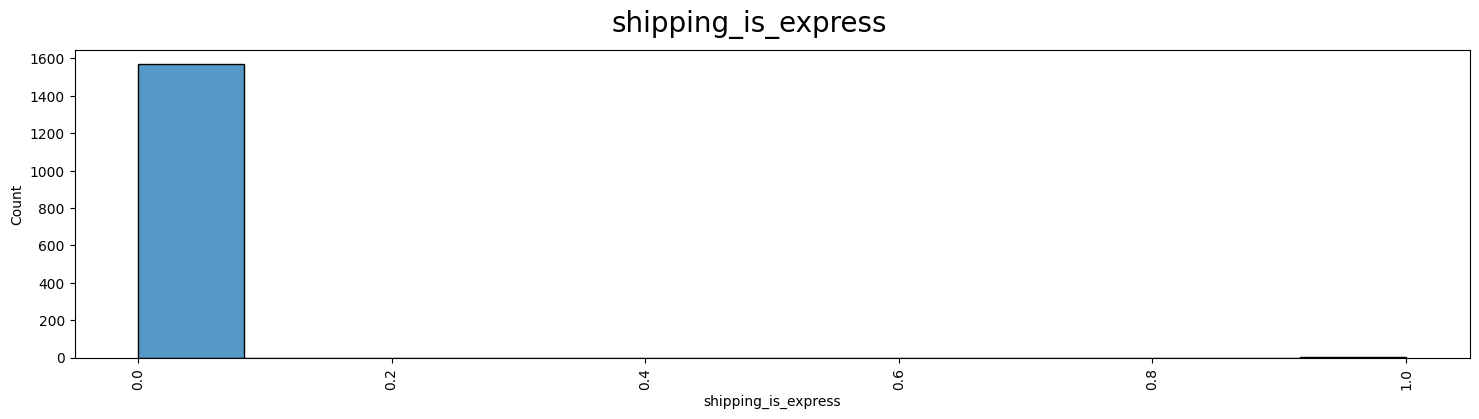

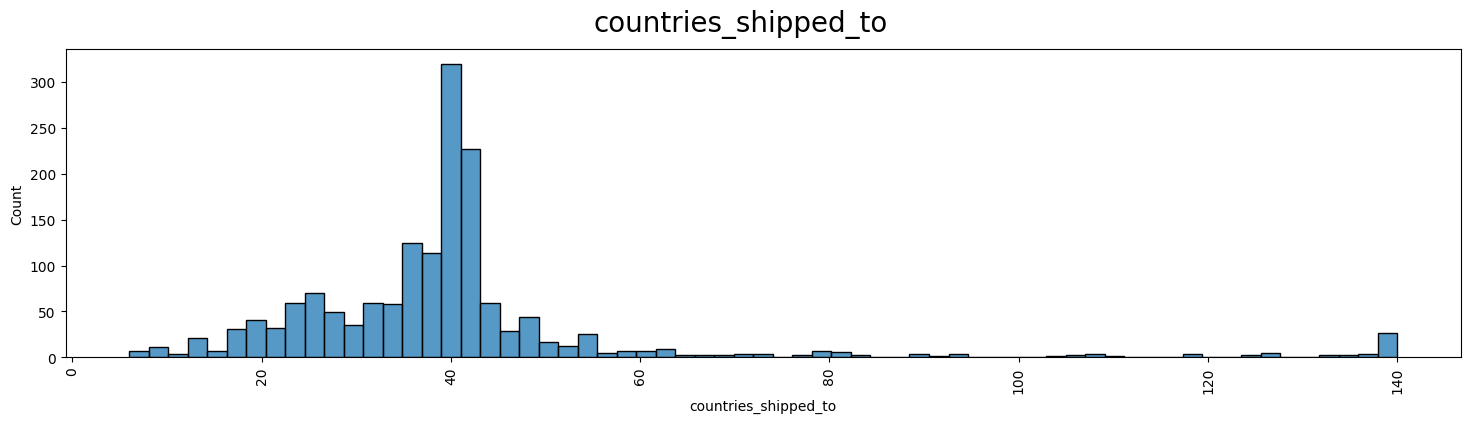

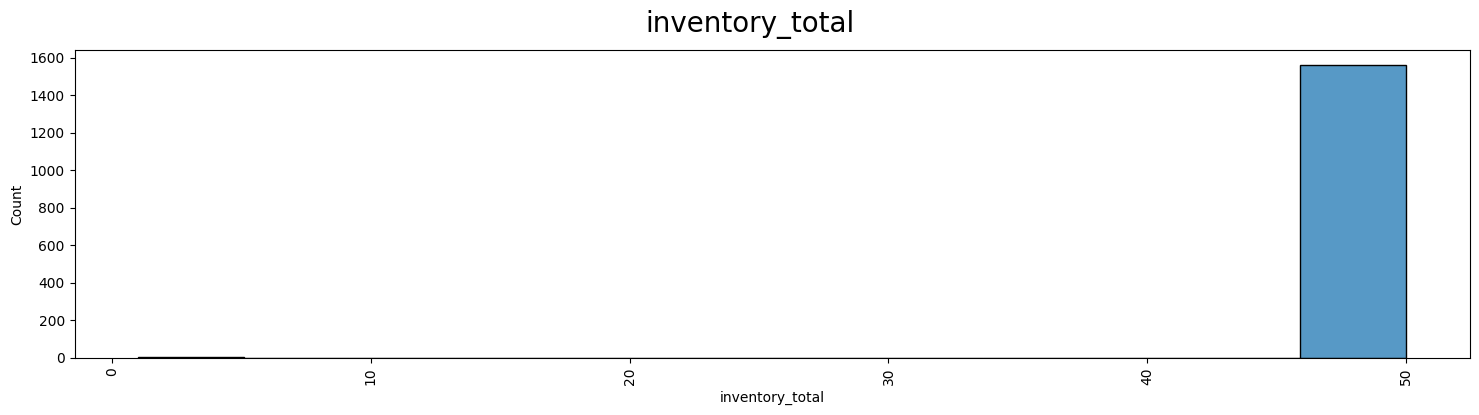

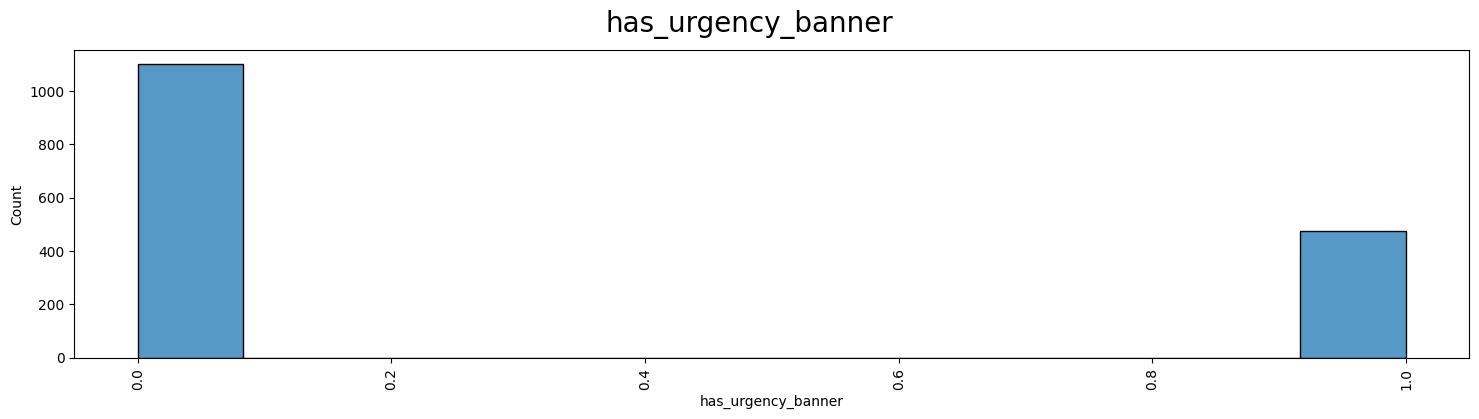

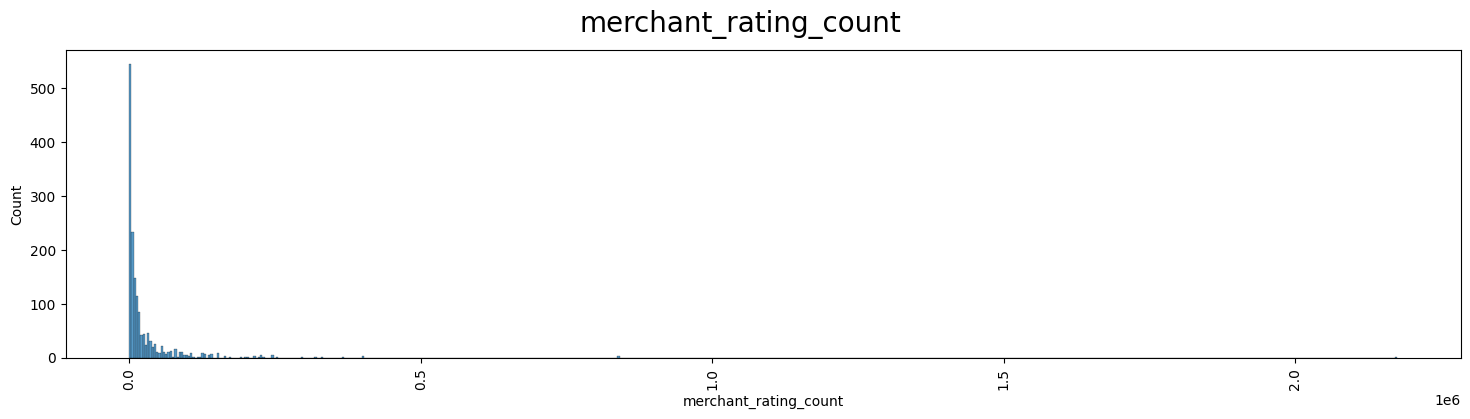

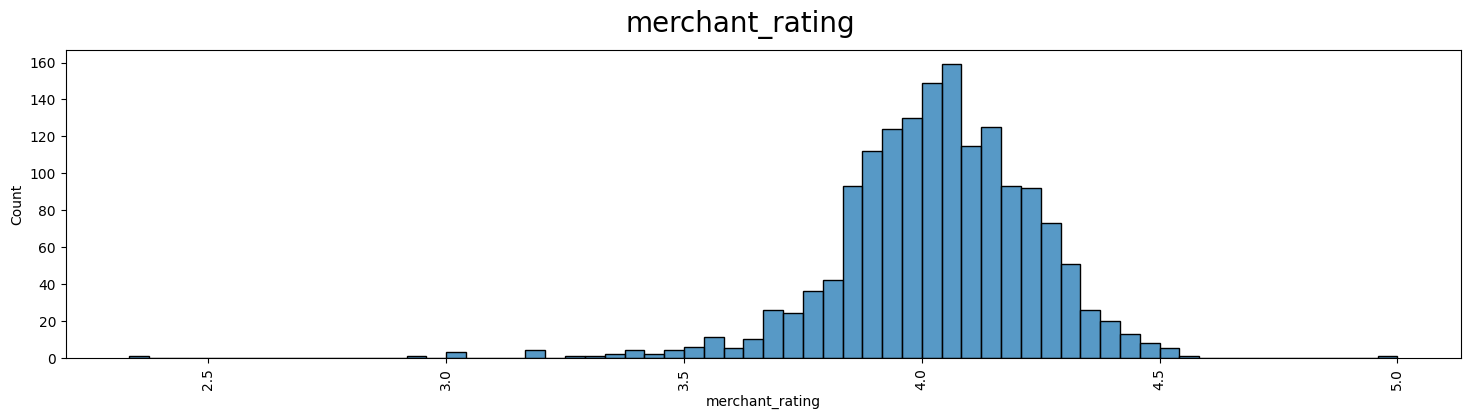

In [19]:
for col in numerical_cols:
    fig, ax = plt.subplots(1, 1, figsize=(18,4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.suptitle(col, fontsize=20)
    plt.show()

A coluna "units_sold" precisará de uma correção, pois não é contínua

#### 2.1.3. Ajuste fino das colunas "tag" e "units sold"

**Units_sold**

In [20]:
df_products["units_sold"].value_counts()

,count
units_sold,
100,509
1000,405
5000,217
10000,177
20000,103
50,76
10,49
50000,17
100000,6


In [21]:
df_products.loc[df_products["units_sold"] < 10, "units_sold"] = 10
df_products["units_sold"].value_counts()

,count
units_sold,
100,509
1000,405
5000,217
10000,177
20000,103
50,76
10,63
50000,17
100000,6


In [22]:
df_products["units_sold"].median()

1000.0

In [23]:
df_products["units_sold"].mean()

4339.052765416402

Como a mediana das vendas é 1000, vamos tentar entender que produtos ficaram acima desse patamar e quais ficaram abaixo.

**Tag**

In [24]:
from wordcloud import WordCloud, STOPWORDS

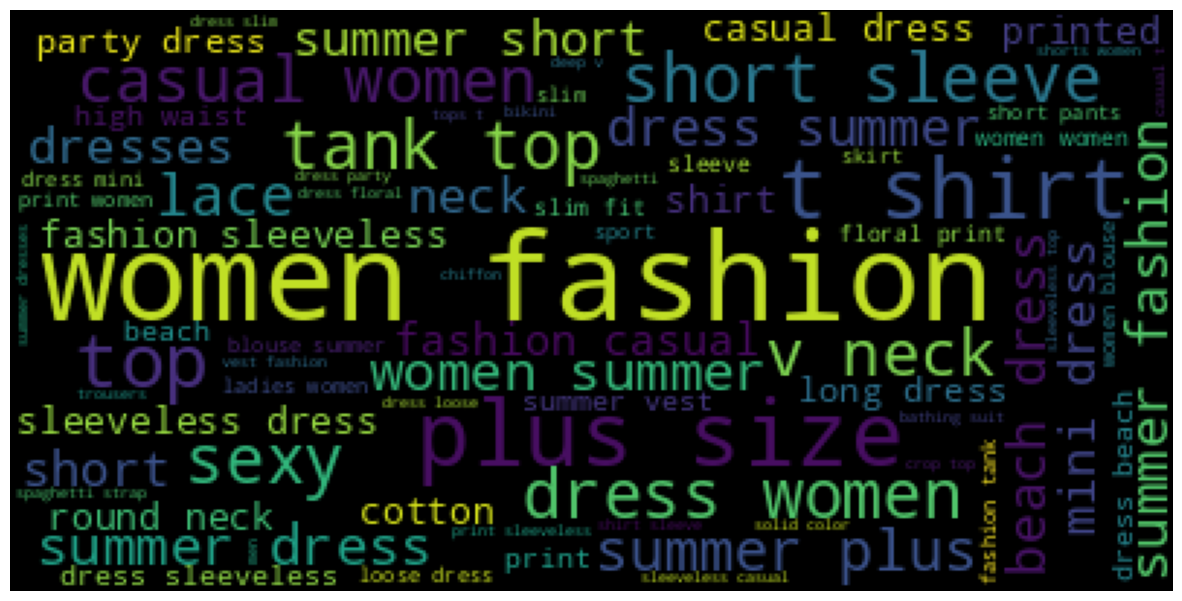

In [25]:
import matplotlib.pyplot as plt
word_string=" ".join(df_products['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.2. Análise de produtos "campeões"

In [26]:
df_products["income"] = df_products["price"] * df_products["units_sold"]

<Axes: xlabel='income', ylabel='Count'>

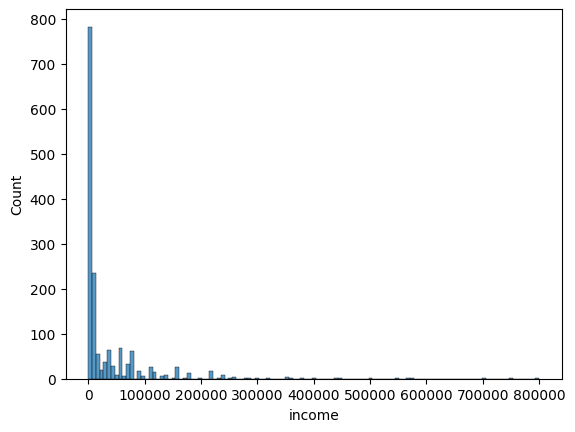

In [27]:
sns.histplot(df_products["income"])

In [28]:
import numpy as np
for i in np.linspace(0, 1, 10):
    print("{:.2f} - {:.2f}".format(i, df_products["income"].quantile(i)))

0.00 - 20.00
0.11 - 369.00
0.22 - 700.00
0.33 - 1100.00
0.44 - 5000.00
0.56 - 8000.00
0.67 - 16000.00
0.78 - 49800.00
0.89 - 90000.00
1.00 - 800000.00


In [29]:
df_products["income"].median()

7000.0

In [30]:
df_products["income"].mean()

35211.941703750796

Repare a diferença entre a média e a mediana quando a distribuição da variável observada não segue uma normal. Nestes casos, vale a pena basearmos nossas análises na mediana.

Vamos tentar estudar os produtos com faturamento superior a $7.000.

In [31]:
df_products["success"] = 0
df_products.loc[df_products["income"] > 7000, "success"] = 1

#### Produtos com maior diferença entre "retail_price" e "price" vendem mais?**

In [32]:
df_products.columns

Index(['title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'income', 'success'],
      dtype='object')

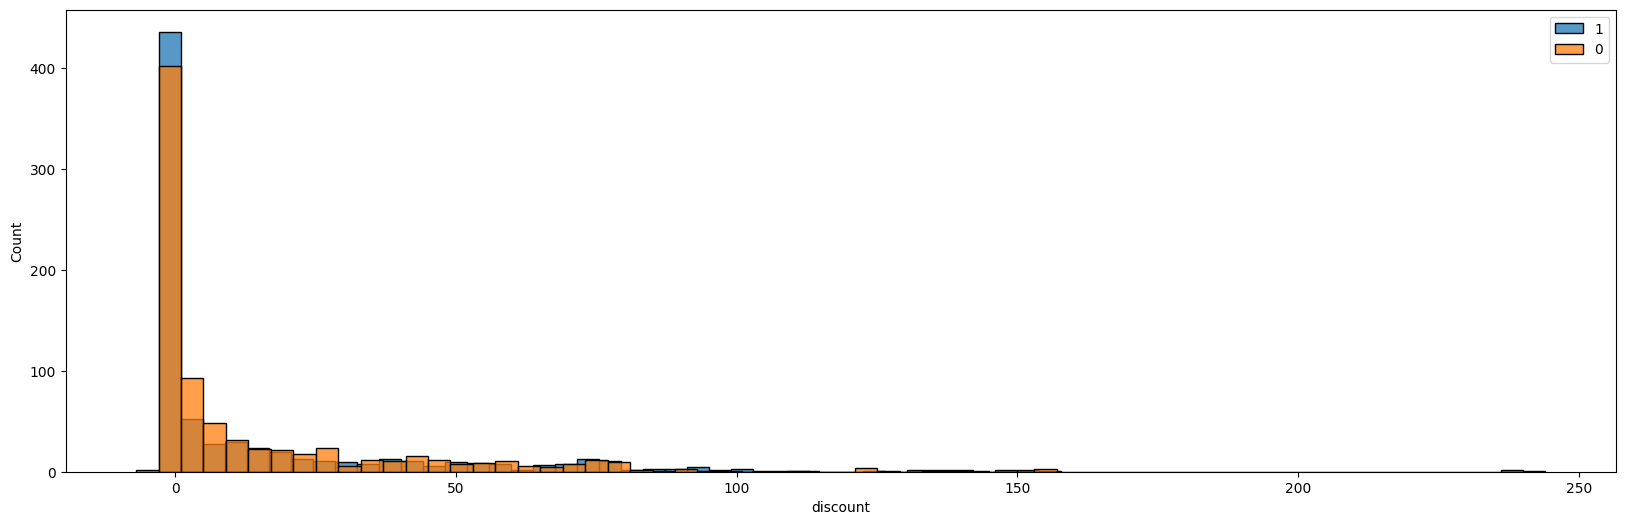

In [33]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df_products.loc[df_products["success"] == 1, "discount"], label="1")
sns.histplot(df_products.loc[df_products["success"] == 0, "discount"], label="0")
plt.legend()

#### Ad boost aumentam as vendas?

In [34]:
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts()

,count
uses_ad_boosts,
0,441
1,368


In [35]:
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts()

,count
uses_ad_boosts,
0,451
1,313


#### Avaliações melhores aumentam vendas?


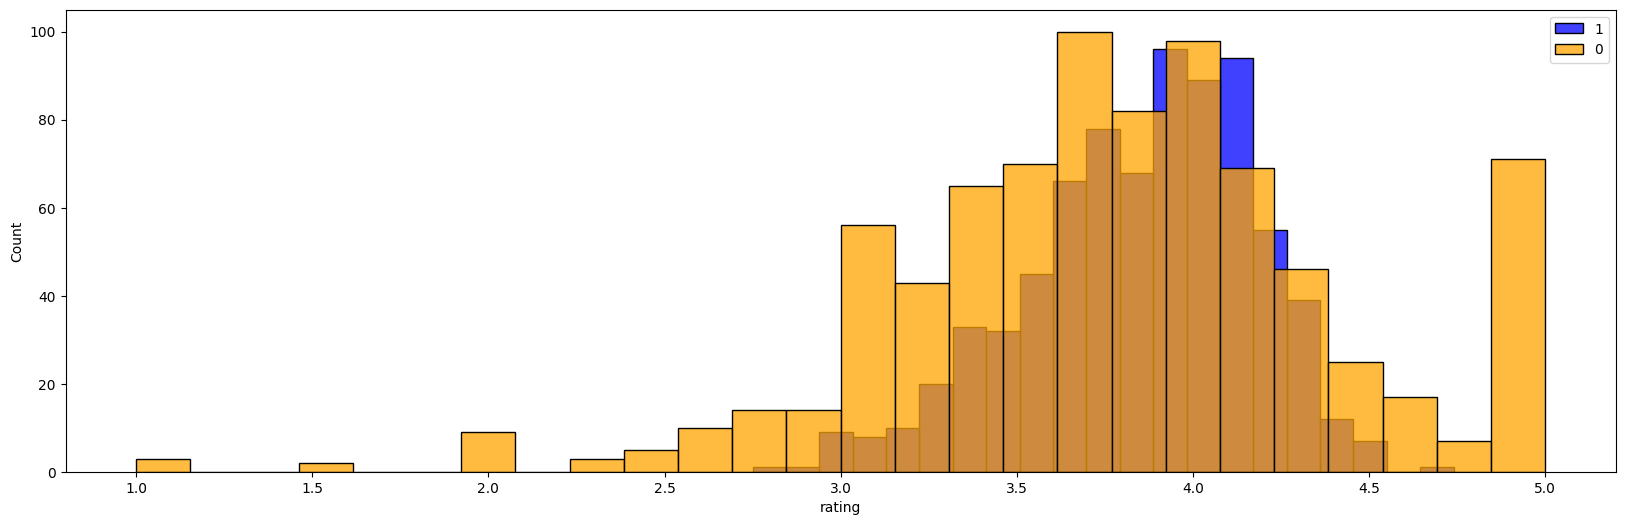

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df_products.loc[df_products["success"] == 1, "rating"], label="1", color="blue")
sns.histplot(df_products.loc[df_products["success"] == 0, "rating"], label="0", color="orange")
plt.legend()

#### Badges importam?

In [37]:
df_products.groupby(["success", "badges_count"]).count()[["title"]].pivot_table(index="success", columns="badges_count").fillna(0)

title                
badges_count      0     1    2    3
success                            
0             753.0  48.0  8.0  0.0
1             669.0  90.0  3.0  2.0

In [38]:
df_products.groupby(["success", "badge_product_quality"]).count()[["title"]].pivot_table(index="success", columns="badge_product_quality").fillna(0)

title      
badge_product_quality      0     1
success                           
0                      770.0  39.0
1                      686.0  78.0

In [39]:
df_products.groupby(["success", "badge_fast_shipping"]).count()[["title"]].pivot_table(index="success", columns="badge_fast_shipping").fillna(0)

title      
badge_fast_shipping      0     1
success                         
0                    795.0  14.0
1                    758.0   6.0

#### Quantidade de tags auxiliam vendas?

In [40]:
df_products["tags_count"] = df_products["tags"].apply(lambda x: len(x.split(",")))

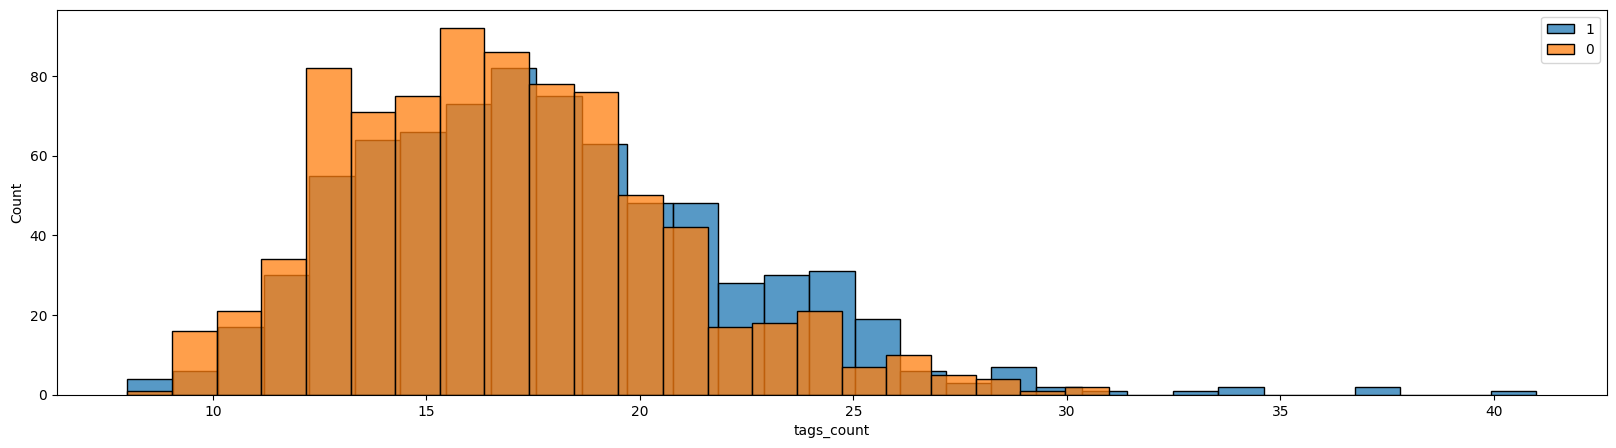

In [41]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
sns.histplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="0")
plt.legend()

#### Tags com maiores vendas?

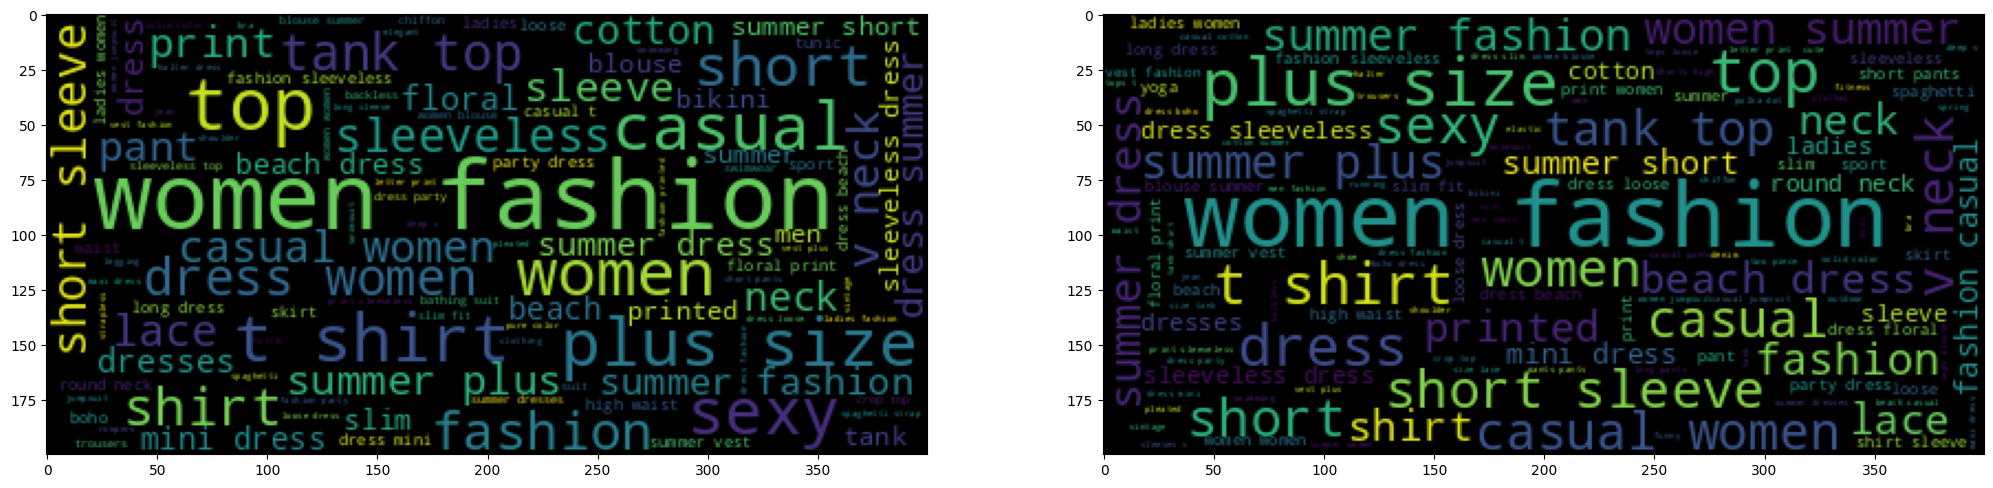

In [42]:
df_success_tags = df_products.loc[df_products["success"] == 1]
word_string=" ".join(df_success_tags['tags'].str.lower())
wordcloud_success = WordCloud(stopwords=STOPWORDS).generate(word_string)

df_fail_tags = df_products.loc[df_products["success"] == 0]
word_string=" ".join(df_fail_tags['tags'].str.lower())
wordcloud_fail = WordCloud(stopwords=STOPWORDS).generate(word_string)

fig, ax = plt.subplots(1, 2, figsize=(25,20))
ax[0].imshow(wordcloud_success)
ax[1].imshow(wordcloud_fail)

plt.show()

**Que palavras aparecem mais nos produtos que vendem mais e menos?**

In [43]:
tags = []
for list_tags in df_success_tags["tags"].values:
    tags += list_tags.split(",")
pd.Series(tags).value_counts().head(5)

,count
Women's Fashion,665
Summer,580
Fashion,527
Women,504
Casual,429


In [44]:
tags = []
for list_tags in df_fail_tags["tags"].values:
    tags += list_tags.split(",")
pd.Series(tags).value_counts().head(5)

,count
Summer,741
Women's Fashion,650
Fashion,555
Casual,476
Women,457


#### Shipping analysis

In [45]:
df_products.groupby(["success", "shipping_is_express"]).count()[["title"]].pivot_table(index="success", columns="shipping_is_express").fillna(0)

title     
shipping_is_express      0    1
success                        
0                    807.0  2.0
1                    762.0  2.0

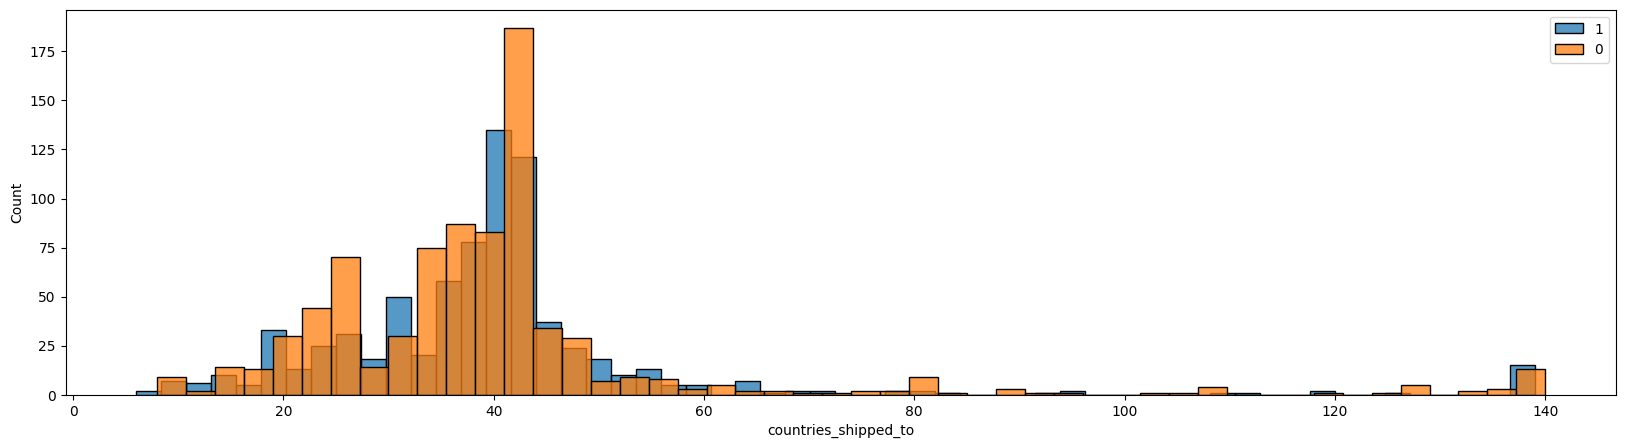

In [46]:
df_products["discount"] = df_products["retail_price"] - df_products["price"]

fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(df_products.loc[df_products["success"] == 1, "countries_shipped_to"], label="1")
sns.histplot(df_products.loc[df_products["success"] == 0, "countries_shipped_to"], label="0")
plt.legend()

## 3. Machine Learning

In [47]:
from sklearn.model_selection import train_test_split

model_cols = ['price', 'retail_price', 'uses_ad_boosts', 'rating', 'badges_count',
                'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory',
                'shipping_is_express', 'countries_shipped_to', 'inventory_total',
                'has_urgency_banner', 'merchant_rating', 'discount', 'tags_count']

x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [49]:
grid_search.best_params_
rf_model = grid_search.best_estimator_

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       241
           1       0.74      0.75      0.75       231

    accuracy                           0.75       472
   macro avg       0.75      0.75      0.75       472
weighted avg       0.75      0.75      0.75       472

[[180  61]
 [ 57 174]]


**Feature importance**

<Axes: >

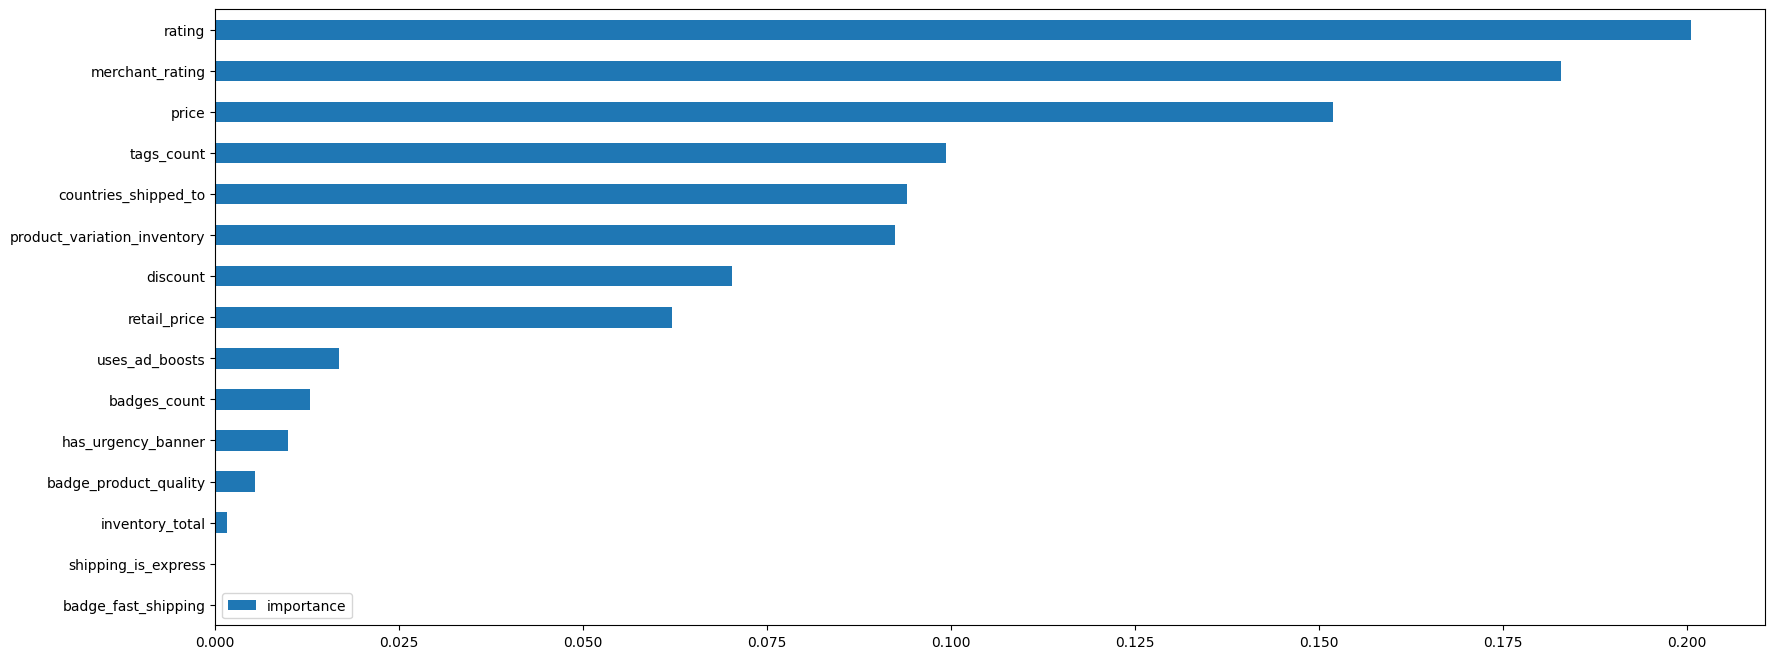

In [51]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

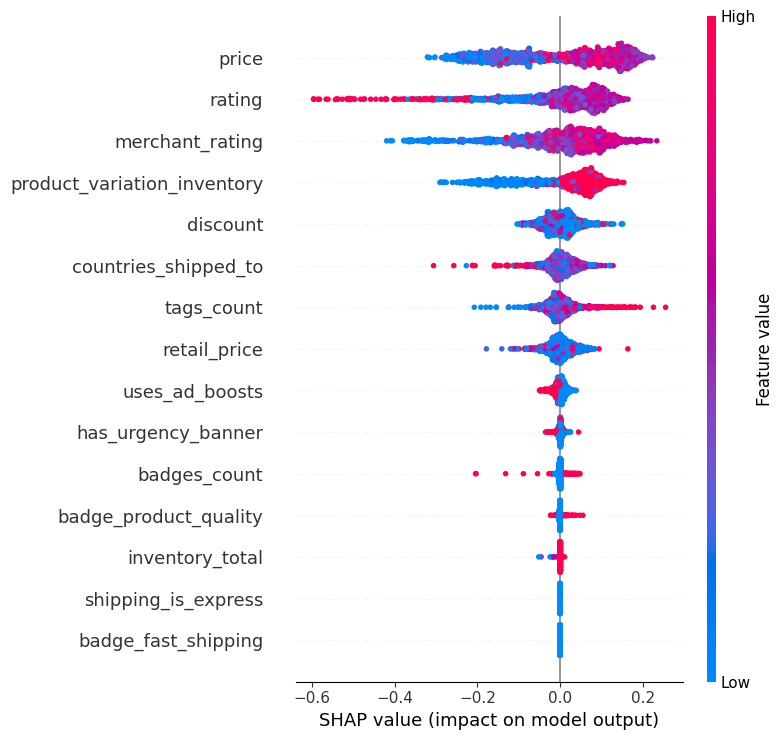

In [52]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[:, :, 1], x)